In [1]:
import pandas as pd 
import numpy as np 
import networkx as nx 

### Dataset Description

Based on the dataset description, this is a **scientific collaboration network** in which:

- **Nodes** represent authors.
- **Edges** represent collaborations (co-authorship).
- If a paper has multiple authors, it creates a **complete subgraph** between those authors.
- The dataset spans from **January 1993 to April 2003**.


Dataset can be found in  : https://snap.stanford.edu/data/ca-GrQc.html

In [3]:
file_path = 'data\CA-GrQc.txt'

df = pd.read_csv(file_path, sep='\t', header=None, names=['Author1', 'Author2'])
df.head()

,Author1,Author2
0,3466,937
1,3466,5233
2,3466,8579
3,3466,10310
4,3466,15931


In [6]:
# undirected graph 
G = nx.from_pandas_edgelist(df, 'Author1', 'Author2')

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 5242
Number of edges: 14496


# Dataset Scope : 

- **Nodes: 5242**: This tells you the total number of unique authors in the dataset.
- **Edges: 28980**: This indicates the total number of collaborations.


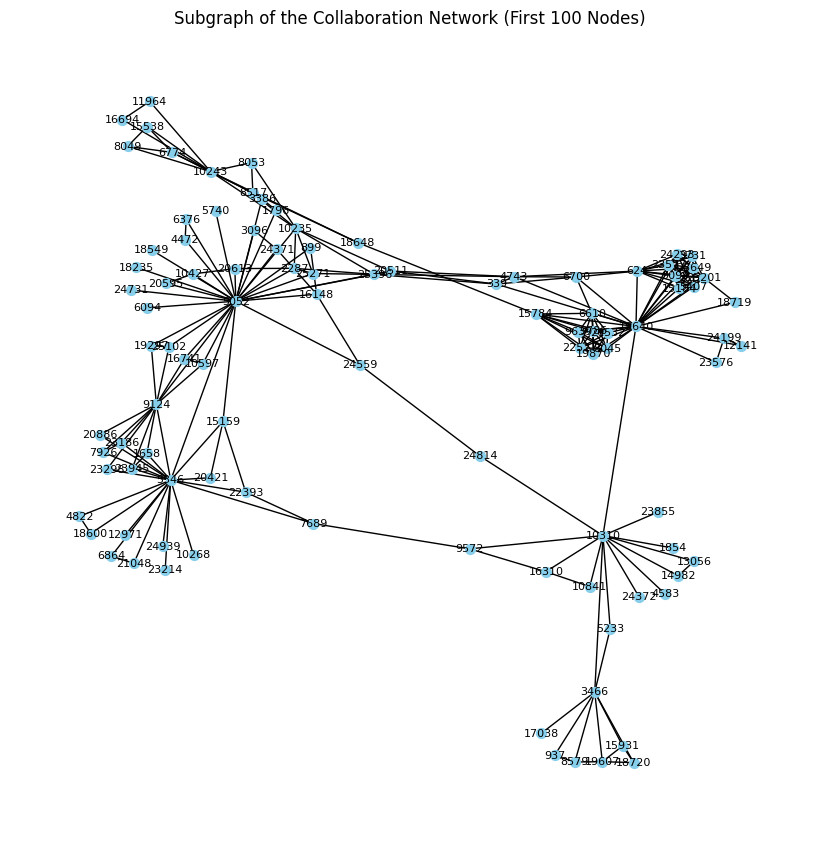

In [8]:
import matplotlib.pyplot as plt


subgraph = G.subgraph(list(G.nodes)[:100]) # subgraph of first 100 nodes 

# spring layout
pos = nx.spring_layout(subgraph, seed=42)  


plt.figure(figsize=(8, 8))
nx.draw(subgraph, pos, node_size=50, node_color="skyblue", with_labels=True, font_size=8)
plt.title("Subgraph of the Collaboration Network (First 100 Nodes)")
plt.show()


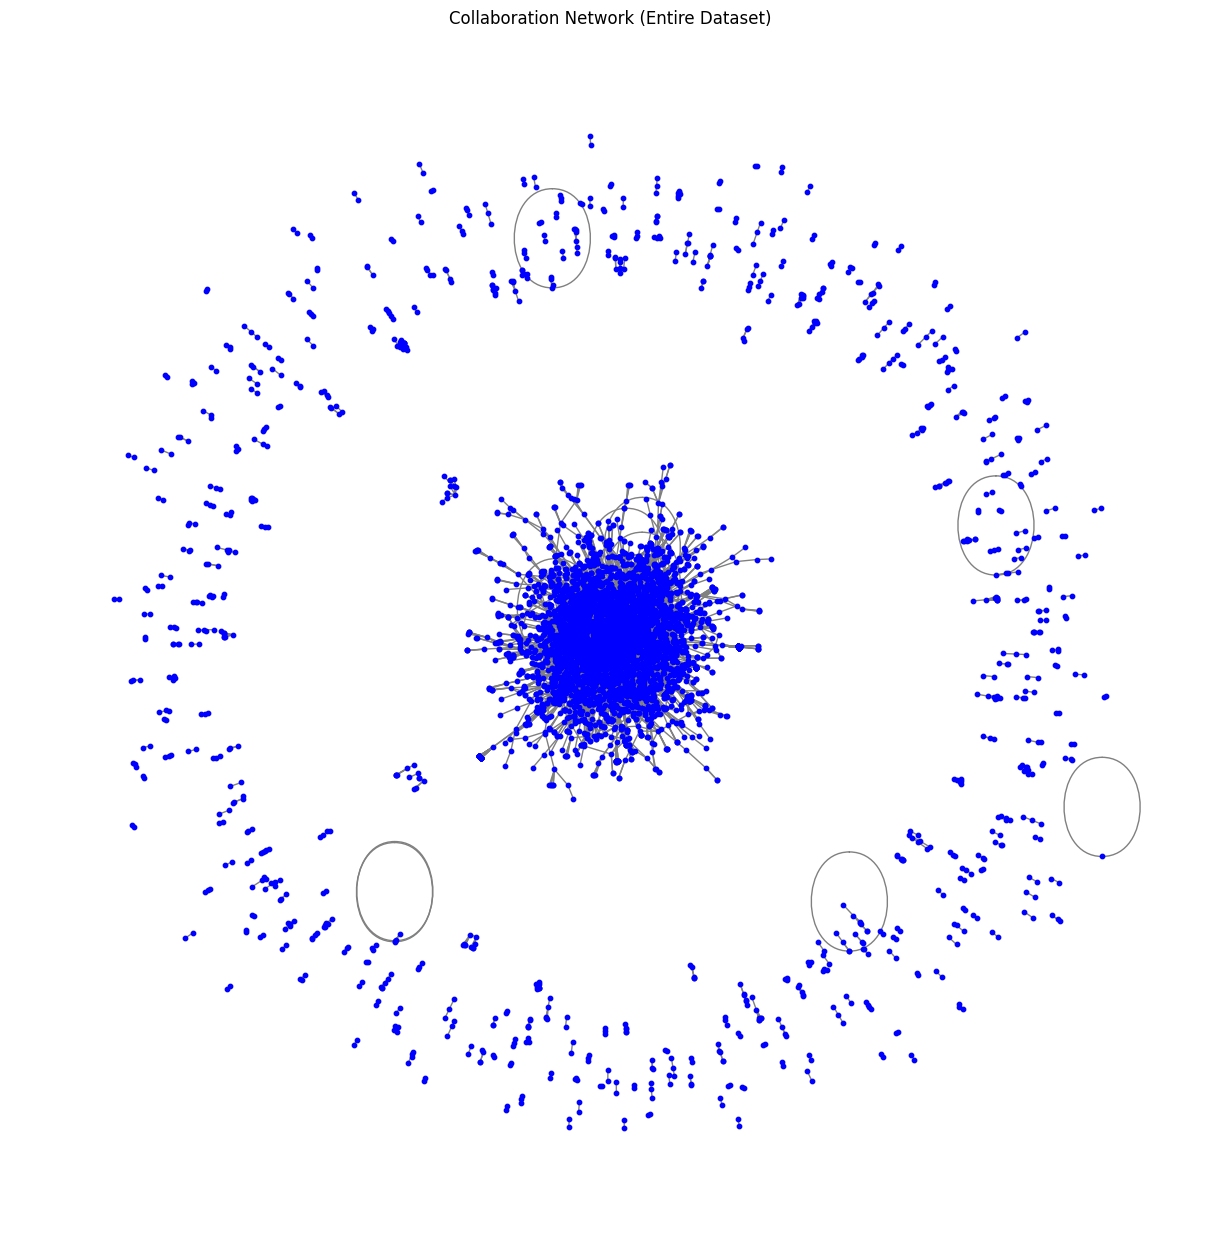

In [9]:
pos = nx.spring_layout(G, seed=42)  


plt.figure(figsize=(12, 12))
nx.draw(G, pos, node_size=10, node_color="blue", edge_color="gray", with_labels=False)
plt.title("Collaboration Network (Entire Dataset)")
plt.show()

# Metrics : 

## Average degree:

In [12]:
degrees = [val for (node, val) in G.degree()]

average_degree = sum(degrees) / len(degrees)

print(f"Average Degree: {average_degree:.2f}")


Average Degree: 5.53


On average, each author collaborates with approximately 5-6 others, indicating a moderate level of collaboration typical for small to medium-sized research teams.


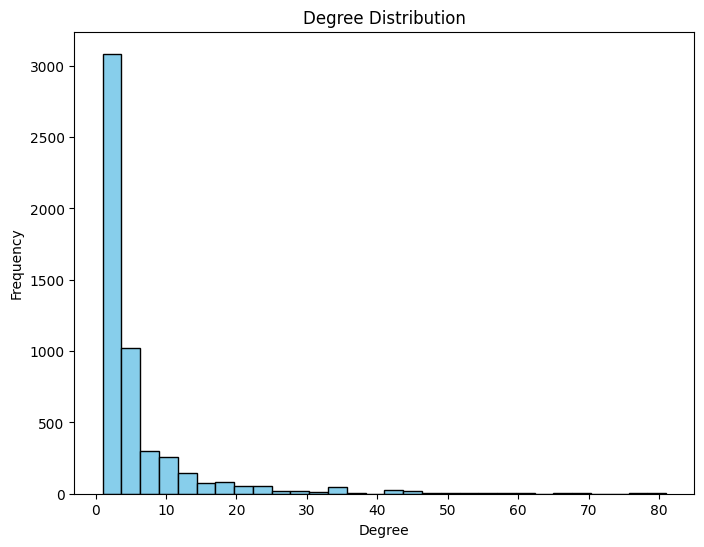

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=30, color='skyblue', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [16]:
# top 5 highest degrees 

degree_counts = dict(G.degree())

top_5_degrees = sorted(degree_counts.items(), key=lambda x: x[1], reverse=True)[:5]

top_5_degrees

[(21012, 81), (21281, 79), (22691, 77), (12365, 77), (6610, 68)]

- **Node 21012** has the highest degree (81), meaning it collaborates with 81 other authors.
- **Node 21281** degree of 79; indicating 79 collaborations.
- **Node 22691** and **Node 12365** each have a similar degree of 77, showing they are involved in 77 collaborations.
- **Node 6610** has a degree of 68, suggesting it collaborates with 68 other authors.

These nodes represent the most central authors in the network, with extensive collaboration across multiple papers,and play a crucial role in the connectivity and flow of information within the scientific community.


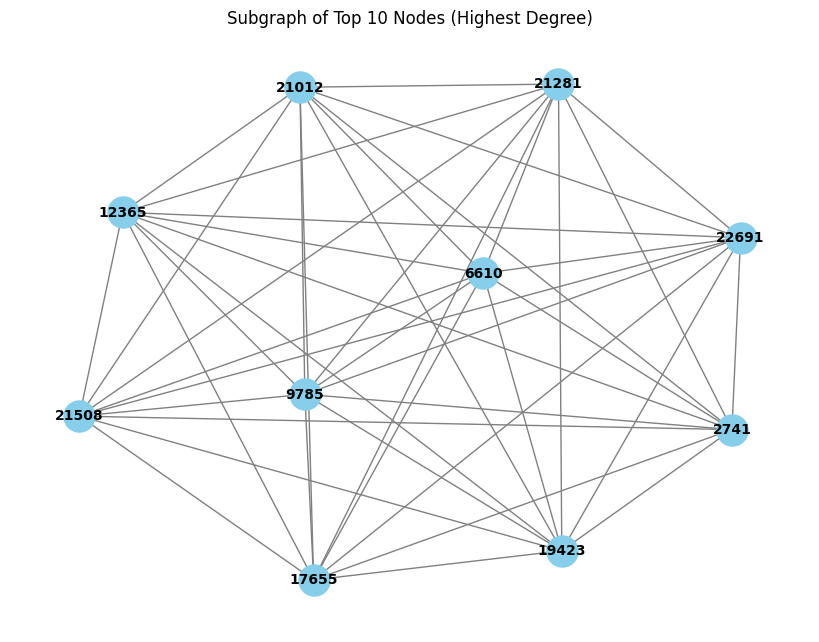

In [17]:
# top 10 nodes with the highest degrees
top_10_nodes = [node for node, degree in sorted(degree_counts.items(), key=lambda x: x[1], reverse=True)[:10]]


subgraph = G.subgraph(top_10_nodes)


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph, seed=42)  
nx.draw(subgraph, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Subgraph of Top 10 Nodes (Highest Degree)")
plt.show()


The graph of the top 10 nodes with the highest degrees resembles a "spider web," indicating a dense, tightly connected subnetwork. (connexe) These nodes form a core group of highly collaborative authors, suggesting a central cluster within the broader collaboration network where information and research flow freely.


In [19]:

betweenness_centrality = nx.betweenness_centrality(G)

# top 10 nodes with the highest betweenness centrality
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_betweenness_nodes = [node for node, _ in top_10_betweenness]


In [20]:
top_10_betweenness

[(13801, 0.037027150433897676),
 (9572, 0.025689005573850524),
 (14599, 0.025488418054511023),
 (7689, 0.024970551728636943),
 (13929, 0.02465268472568471),
 (5052, 0.024422231614460266),
 (14485, 0.023502736469008904),
 (2710, 0.022354920330838166),
 (14265, 0.01973105873743096),
 (17655, 0.01799856257605194)]

- **Nodes with high betweenness centrality** are key connectors in the collaboration network.
- For example, **node 13801** (score: 0.037) acts as a bridge between research clusters.
- Other important nodes include:
  - **Node 9572** (score: 0.0257)
  - **Node 14599** (score: 0.0255)
  - **Node 7689** (score: 0.0250)
- These authors play a central role in facilitating collaboration and communication between different research groups.
- Nodes with high betweenness centrality act as **hubs**, connecting otherwise isolated subgroups. (communities)

And also , in a negative aspect , if these authors are exposed to any fake news , they'll be able to spread it way faster than others.

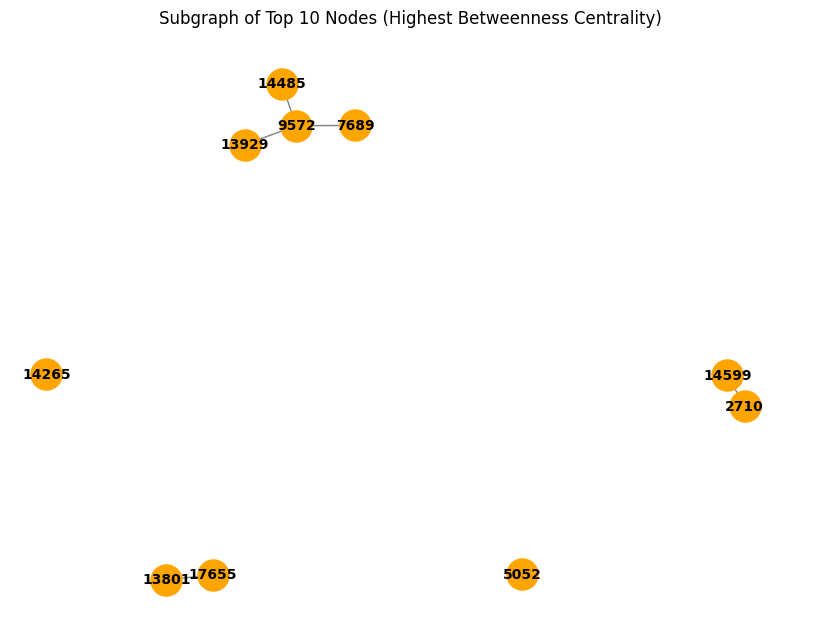

In [21]:
subgraph_betweenness = G.subgraph(top_10_betweenness_nodes)


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph_betweenness, seed=42)
nx.draw(subgraph_betweenness, pos, with_labels=True, node_size=500, node_color='orange', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Subgraph of Top 10 Nodes (Highest Betweenness Centrality)")
plt.show()

# Centrality measures : 

## Degree centrality : 

In [ ]:
degree_centrality = nx.degree_centrality(G)

top_5_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by Degree Centrality:")
for node, centrality in top_5_degree:
    print(f"- Node {node} with a degree centrality of {centrality:.4f}")


Top 5 nodes by Degree Centrality:
- Node 21012 with a degree centrality of 0.0155
- Node 21281 with a degree centrality of 0.0151
- Node 22691 with a degree centrality of 0.0147
- Node 12365 with a degree centrality of 0.0147
- Node 6610 with a degree centrality of 0.0130


## Betweenness centrality :

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)

top_5_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes by Betweenness Centrality:")
for node, centrality in top_5_betweenness:
    print(f"- Node {node} with a betweenness centrality of {centrality:.3f}")


Top 5 nodes by Betweenness Centrality:
- Node 13801 with a betweenness centrality of 0.037
- Node 9572 with a betweenness centrality of 0.026
- Node 14599 with a betweenness centrality of 0.025
- Node 7689 with a betweenness centrality of 0.025
- Node 13929 with a betweenness centrality of 0.025


## Closeness centrality : 

In [29]:
closeness_centrality = nx.closeness_centrality(G)

top_5_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes by Closeness Centrality:")
for node, centrality in top_5_closeness:
    print(f"- Node {node} with a closeness centrality of {centrality:.4f}")


Top 5 nodes by Closeness Centrality:
- Node 13801 with a closeness centrality of 0.1943
- Node 14485 with a closeness centrality of 0.1895
- Node 9572 with a closeness centrality of 0.1890
- Node 17655 with a closeness centrality of 0.1890
- Node 2654 with a closeness centrality of 0.1871


- **Node 13801** has the highest closeness centrality of **0.1943**, indicating it is the **most centrally located author** in the network, able to reach other authors more quickly. ( Even negatively with fake news)
- **Node 14485** (centrality of **0.1895**) and **Node 9572** (centrality of **0.1890**) are also well-positioned in the network, with **high accessibility** to other nodes.
- **Node 17655** (centrality of **0.1890**) shares a similar centrality value, indicating it is also relatively close to many authors.
- **Node 2654** (centrality of **0.1871**) rounds out the top 5, with slightly less proximity but still indicating a fairly central position in the collaboration network.

These nodes are critical in facilitating the flow of ideas and interactions across the network, as they are strategically positioned to connect with a wide range of authors.

The top nodes identified by different centrality measures are not the same, except for 2 : 

- **Node 13801** appears as the top node in both **Betweenness Centrality** (0.037) and **Closeness Centrality** (0.1943), indicating that it is **highly influential** in terms of both its **intermediary** role (connecting other nodes) and its ability to reach other nodes quickly within the network.

- **Node 9572** ranks highly in both **Betweenness Centrality** (0.026) and **Closeness Centrality** (0.1890), which suggests it plays an important role in facilitating communication across the network while also being centrally located in terms of reachability.




# Community detection : 

## Louvain method: 

In [38]:
from community import community_louvain

louvain_partition = community_louvain.best_partition(G)
num_louvain_communities = len(set(louvain_partition.values()))

print(f"Total number of communities detected by Louvain: {num_louvain_communities}")

Total number of communities detected by Louvain: 393


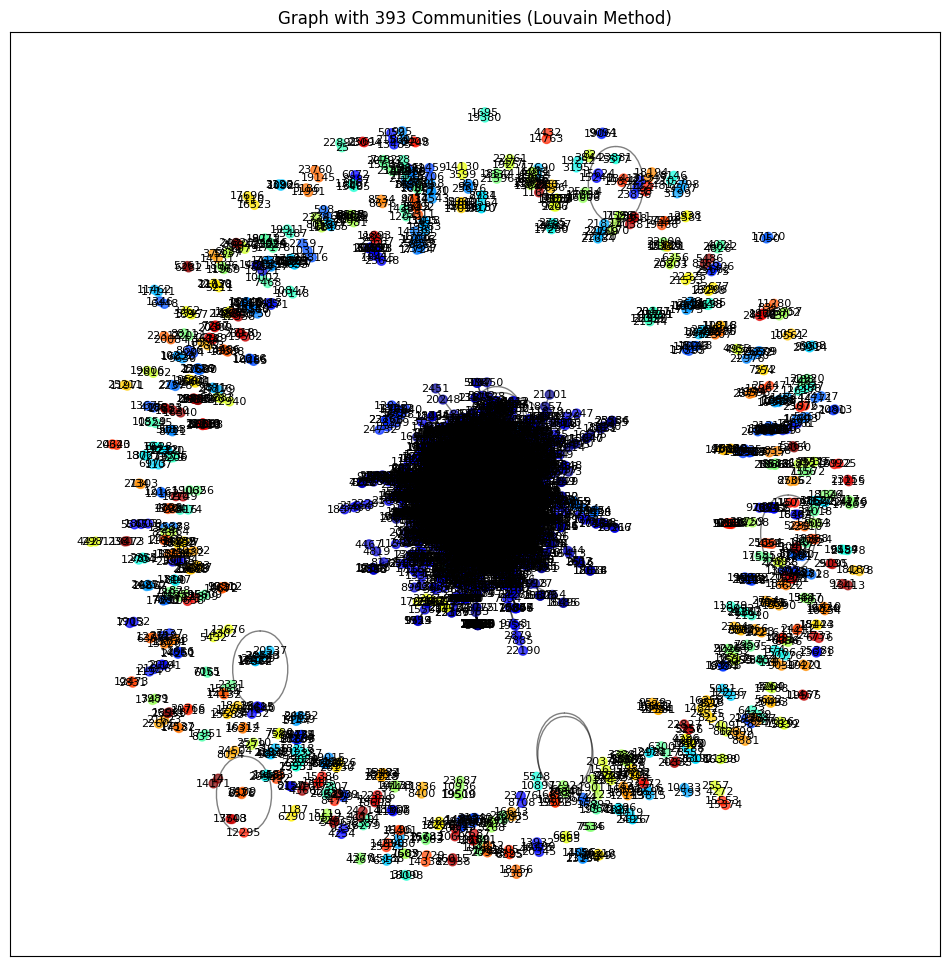

In [39]:

# color map for communities
community_values = list(louvain_partition.values())
unique_communities = set(community_values)
color_map = {community: plt.cm.jet(i / len(unique_communities)) for i, community in enumerate(unique_communities)}

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  
node_colors = [color_map[louvain_partition[node]] for node in G.nodes()]  # color to nodes based on their community


nx.draw_networkx_nodes(G, pos, node_size=40, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')


plt.title(f"Graph with {num_louvain_communities} Communities (Louvain Method)")
plt.show()


In [43]:
communities = list(set(louvain_partition.values())) 

print(communities)

#  first 5 communities
chosen_communities = communities[:5]  

chosen_communities

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

[0, 1, 2, 3, 4]

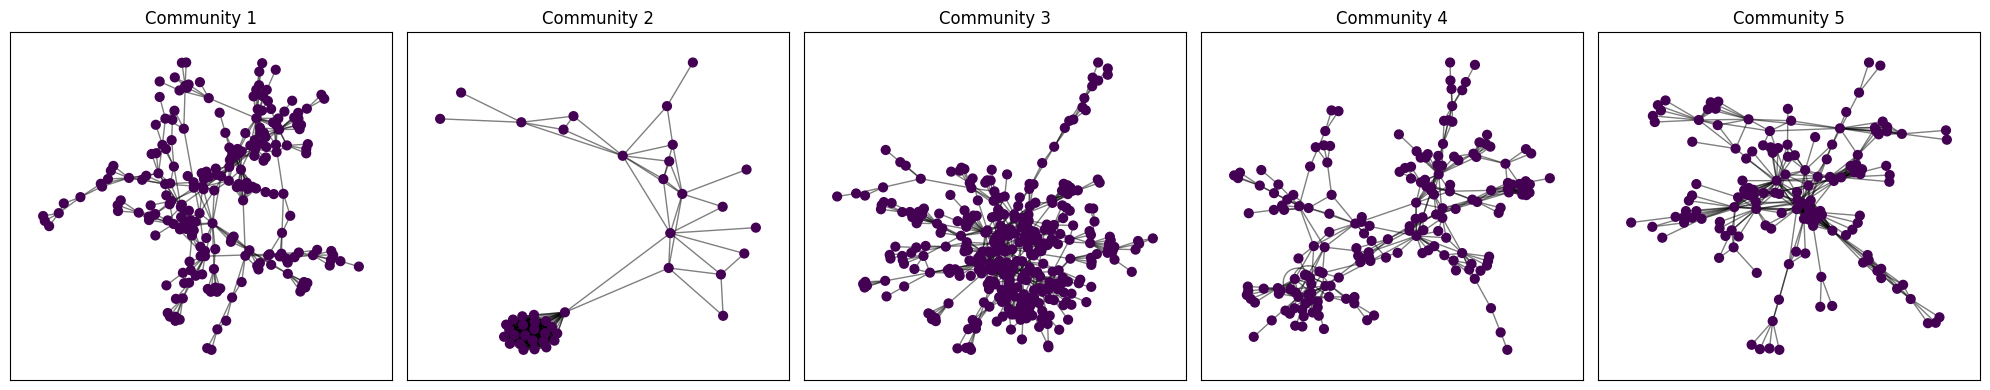

In [45]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  

for i, community in enumerate(chosen_communities):
    community_nodes = [node for node, comm in louvain_partition.items() if comm == community]
    
    
    subgraph = G.subgraph(community_nodes)
    
    
    pos = nx.spring_layout(subgraph)
    node_colors = [louvain_partition[node] for node in subgraph.nodes()]
    
    
    nx.draw_networkx_nodes(subgraph, pos, node_size=40, node_color=node_colors, ax=axes[i])
    nx.draw_networkx_edges(subgraph, pos, alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Community {community + 1}")

plt.tight_layout()
plt.show()

## Girvan-Newman method : 

In [47]:
from networkx.algorithms.community import girvan_newman


comp = girvan_newman(G)

# first partition (initial division into communities)
first_partition = next(comp)

num_communities = len(first_partition)

print(f"Total number of communities detected: {num_communities}")


Total number of communities detected: 356


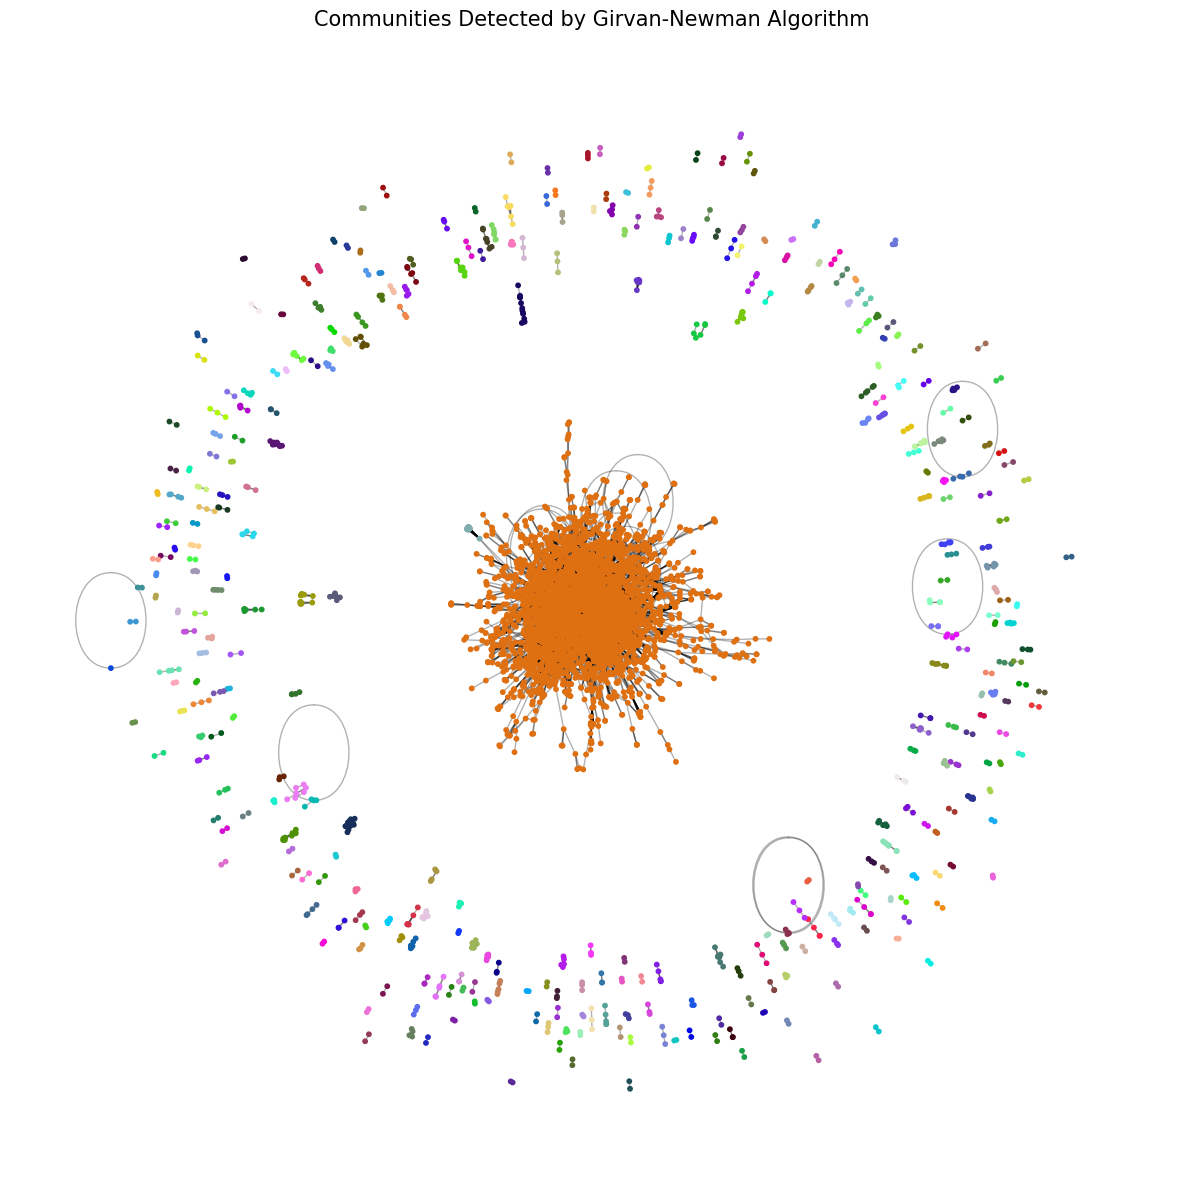

In [48]:
import random

# random color to each community
def assign_colors_to_communities(partition):
    community_colors = {}
    for i, community in enumerate(partition):
        color = "#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)])
        for node in community:
            community_colors[node] = color
    return community_colors

comp = girvan_newman(G)
first_partition = next(comp)


community_colors = assign_colors_to_communities(first_partition)

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)  
nx.draw_networkx_nodes(G, pos, node_size=10, node_color=[community_colors[node] for node in G.nodes()])
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("Communities Detected by Girvan-Newman Algorithm", fontsize=15)
plt.axis("off")
plt.show()

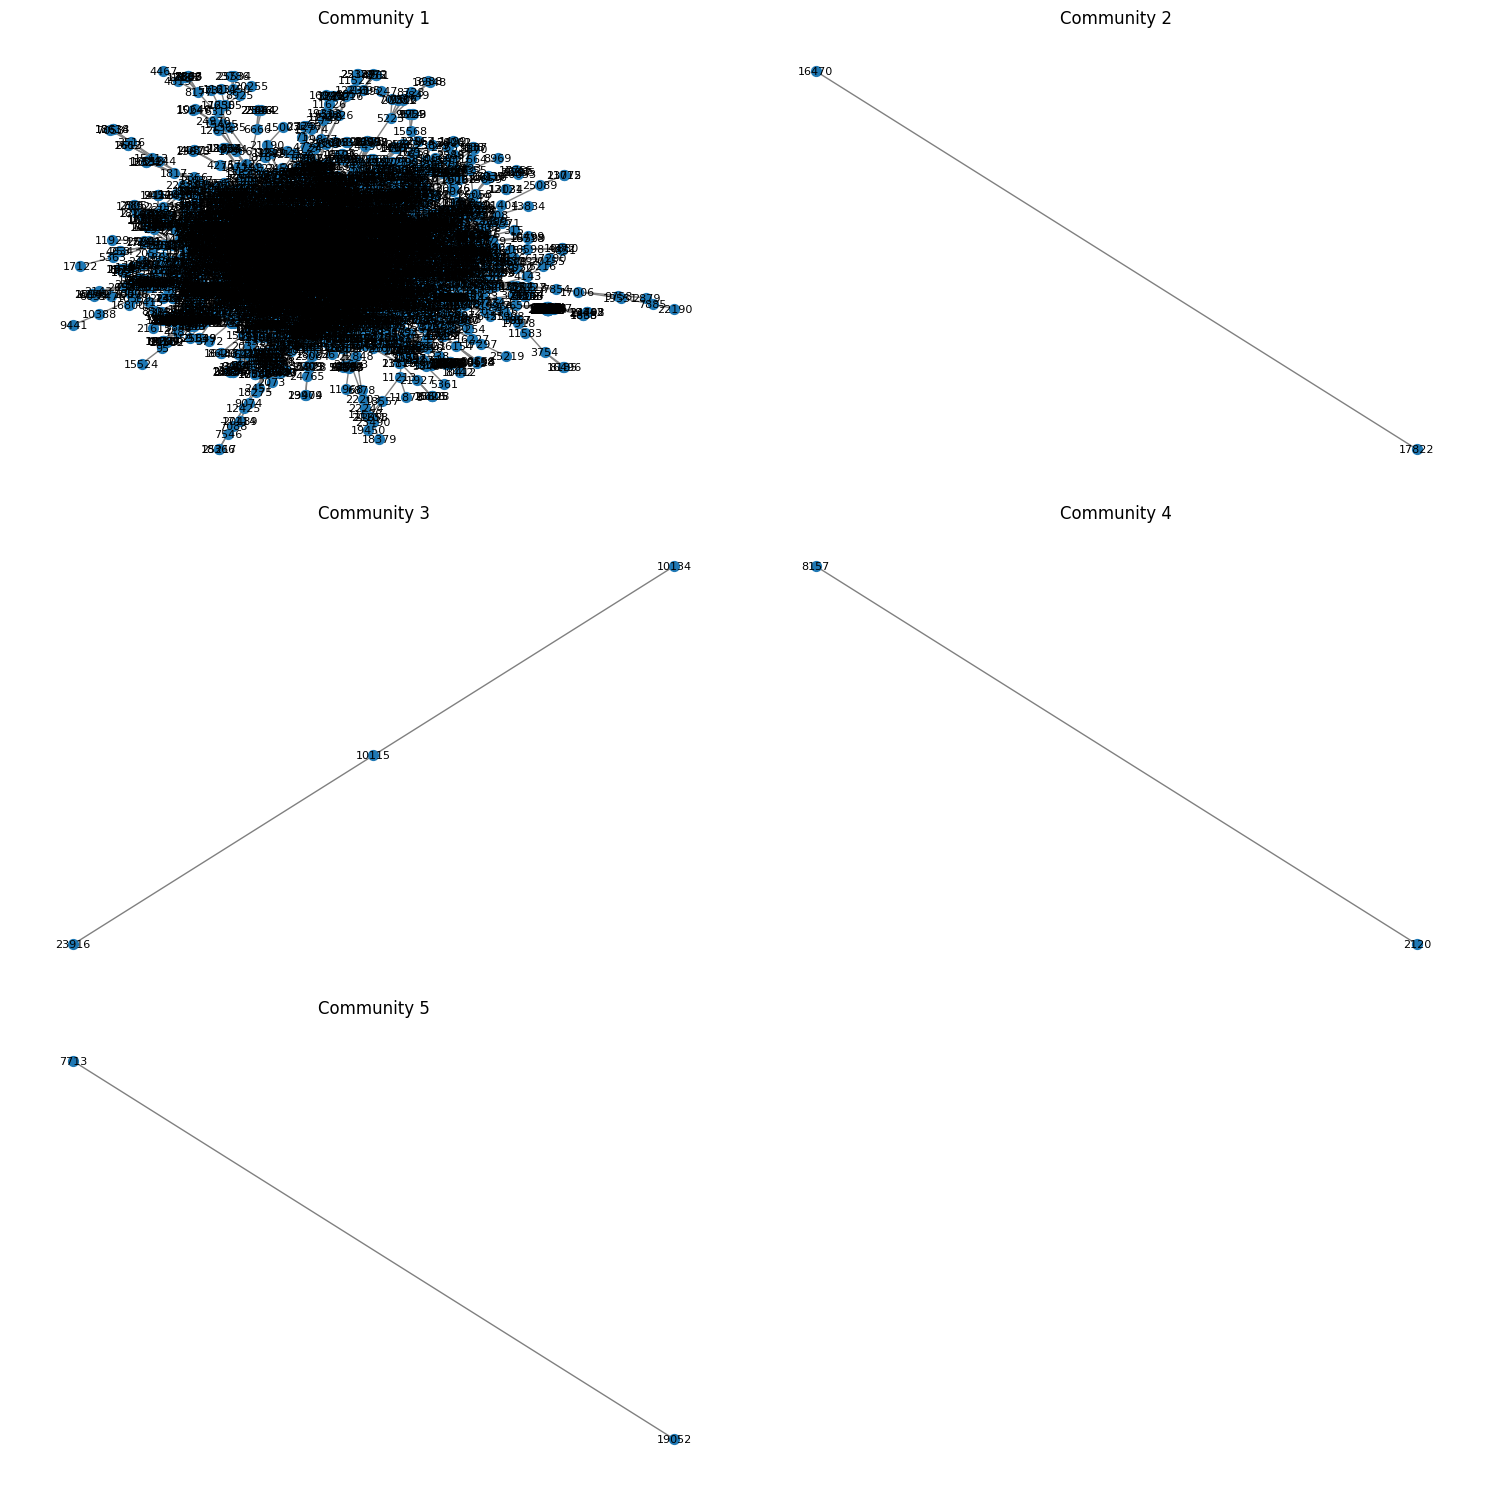

In [49]:
# first 5 communities from the partition
first_5_communities = list(first_partition)[:5]

plt.figure(figsize=(15, 15))

for i, community in enumerate(first_5_communities):
    subgraph = G.subgraph(community)  
    plt.subplot(3, 2, i + 1)  
    pos = nx.spring_layout(subgraph)  
    nx.draw(subgraph, pos, node_size=50, with_labels=True, font_size=8, edge_color='gray')
    plt.title(f"Community {i + 1}")

plt.tight_layout()
plt.show()

- **Louvain Method**: Detects well-connected, natural author groups based on modularity, highlighting strong research collaborations.
- **Girvan-Newman Method**: Identifies tightly-knit communities by progressively removing edges with high betweenness, resulting in more fragmented groups.

### Conclusion:
The detected communities are coherent with the structure of the network, as both methods reveal meaningful groups of authors that are likely to represent research teams or closely collaborating author groups. However, the Girvan-Newman method tends to create more fragmented communities compared to the Louvain method, which detects more consolidated and natural groups.

## Clustering coefficient :

In [51]:
average_clustering = nx.average_clustering(G)

print(f"Average Clustering Coefficient: {average_clustering}")


Average Clustering Coefficient: 0.529635811052136


- **Average Clustering Coefficient: 0.53**
  - This value indicates a moderate level of clustering within the network.
  - Authors tend to form relatively tight-knit groups, suggesting that collaborations are often within well-connected teams.
  - It reflects that, while there are connected research teams, there is still room for cross-collaboration and expansion beyond these groups.


# Conclusion :

### Key Observations:
- The network consists of 5242 authors and 28980 collaborations, with a moderate level of clustering (average coefficient of 0.53).
- Top nodes in **degree**, **betweenness**, and **closeness centrality** (e.g., Node 13801) highlight key contributors to collaboration and information flow.
- **Louvain** detected 393 communities and **Girvan-Newman** detected 356, both revealing distinct, specialized research groups within general relativity.

### Important Nodes:
- **Node 13801** and **Node 9572** are crucial for network connectivity and collaboration.

### Community Organization:
- Communities are tightly-knit, with strong internal connections and less cross-community interaction, suggesting the potential for more interdisciplinary collaboration.

### Implications:
- Promoting collaboration across communities could lead to greater innovation in general relativity research, with central nodes playing a pivotal role in fostering connections.
